<a href="https://colab.research.google.com/github/Pushpalptha/Sentiment-Analysis-for-product-rating-in-E-commerce/blob/main/TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from google.colab import files
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv"
data=pd.read_csv(path)

In [ ]:
print(data.head(10))

   Unnamed: 0  Clothing ID  Age                                 Title  \
0           0          767   33                                   NaN   
1           1         1080   34                                   NaN   
2           2         1077   60               Some major design flaws   
3           3         1049   50                      My favorite buy!   
4           4          847   47                      Flattering shirt   
5           5         1080   49               Not for the very petite   
6           6          858   39                  Cagrcoal shimmer fun   
7           7          858   39  Shimmer, surprisingly goes with lots   
8           8         1077   24                            Flattering   
9           9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pre

In [ ]:
print(data.shape)

(23486, 11)


In [ ]:
#find out number of unique product ids
temp=data['Clothing ID']
temp=set(temp)
print(len(temp))

1206


**24000 reviews are there in total while 1206 products are there in totals**

WordCloud: A module in python that helps us to generate word cloud of the data , here the size of word is proportional to the size of amount of times the word is ouccuring in the database total

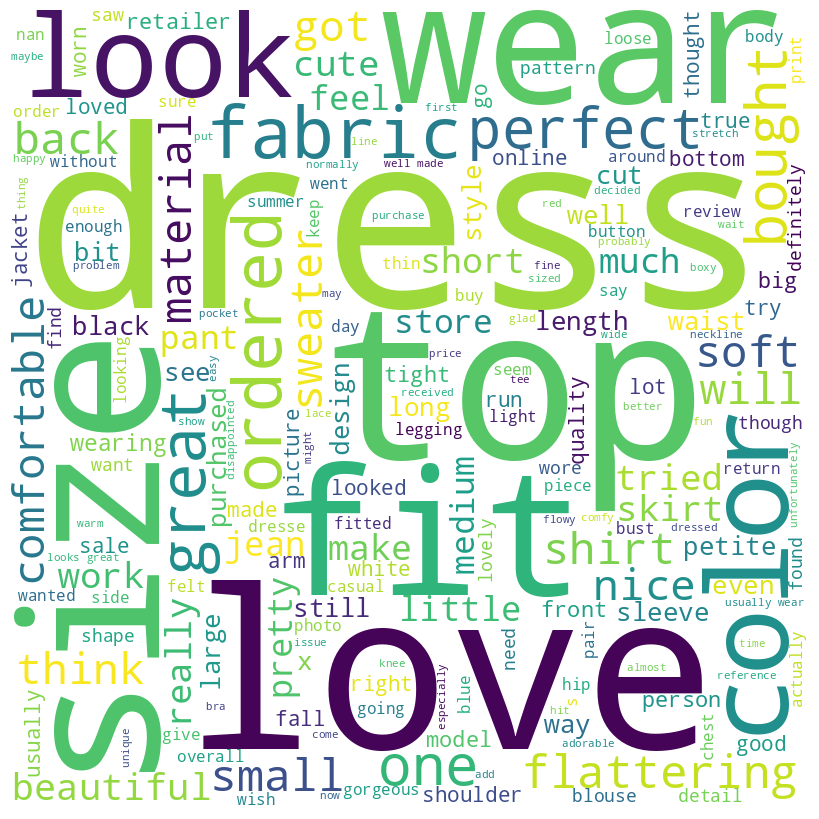

In [ ]:
reviews = data['Review Text']

reviews = [str(i) for i in reviews]

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(reviews))

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
age=list(data['Age'])
class_name=list(data['Class Name'])
print(len(class_name))

23486


In [ ]:
num_classes = 5

data_range = max(age) - min(age)
class_interval = round(data_range / num_classes)

print(class_interval)

16


In [ ]:
print(min(age))
print(max(age))

18
99


In [ ]:
import statistics
statistics.mode(age)

39

In [ ]:
print(age)

[33, 34, 60, 50, 47, 49, 39, 39, 24, 34, 53, 39, 53, 44, 50, 47, 34, 41, 32, 47, 33, 55, 31, 34, 55, 31, 33, 31, 53, 28, 33, 46, 21, 36, 39, 65, 29, 38, 36, 59, 47, 40, 23, 67, 48, 43, 40, 52, 56, 33, 46, 41, 39, 39, 66, 61, 33, 31, 36, 52, 41, 36, 28, 57, 43, 58, 60, 40, 37, 56, 38, 36, 27, 47, 59, 48, 31, 28, 47, 62, 68, 61, 33, 68, 37, 58, 39, 39, 38, 24, 51, 29, 23, 31, 23, 83, 44, 44, 50, 33, 39, 40, 69, 23, 51, 66, 47, 66, 23, 47, 44, 44, 50, 61, 32, 52, 51, 32, 37, 54, 33, 63, 29, 24, 50, 34, 71, 30, 52, 28, 62, 39, 46, 36, 65, 35, 31, 52, 34, 31, 36, 39, 35, 51, 39, 39, 39, 47, 64, 38, 36, 39, 53, 36, 44, 48, 37, 43, 53, 33, 39, 52, 64, 52, 42, 35, 56, 55, 40, 47, 36, 46, 66, 51, 34, 30, 43, 52, 35, 41, 39, 39, 50, 27, 33, 35, 34, 41, 54, 41, 47, 52, 46, 22, 40, 62, 26, 38, 53, 49, 43, 36, 36, 63, 56, 48, 43, 44, 40, 44, 54, 72, 52, 47, 67, 39, 46, 64, 30, 38, 36, 52, 61, 29, 38, 35, 55, 57, 55, 39, 39, 46, 37, 29, 83, 29, 49, 42, 63, 56, 55, 32, 26, 60, 48, 38, 49, 41, 28, 28,

**Binning:** The proccess of sorting data into bins of equal sizes such that each bin contains the same number of data items is called binning

In [ ]:
cat_1_age=age[0:3355]
cat_2_age=age[3355:6710]
cat_3_age=age[6710:10065]
cat_4_age=age[10065:13420]
cat_5_age=age[13420:16775]
cat_6_age=age[16775:20130]
cat_7_age=age[20130:23485]
cat_1_class_name=class_name[0:3355]
cat_2_class_name=class_name[3355:6710]
cat_3_class_name=class_name[6710:10065]
cat_4_class_name=class_name[10065:13420]
cat_5_class_name=class_name[13420:16775]
cat_6_class_name=class_name[16775:20130]
cat_7_class_name=class_name[20130:23485]

In [ ]:
#what products women like base on age
print(max(cat_1_age))
print(max(cat_2_age))
print(max(cat_3_age))
print(max(cat_4_age))
print(max(cat_5_age))
print(max(cat_6_age))

93
94
99
99
92
94


<Axes: ylabel='Count'>

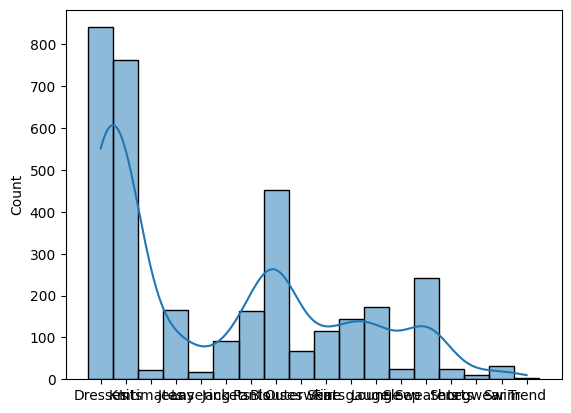

In [ ]:
import seaborn as sns
label_array=["18-31","31-35","35-39","39-44","44-50","50-58"]
sns.histplot(data=cat_3_class_name,kde=True)

In [ ]:
data=data.drop(labels=['Unnamed: 0'], axis=1)

In [ ]:
numerical = ['Age','Positive Feedback Count']

categorical =['Rating','Recommended IND','Division Name','Department Name','Class Name','Clothing ID']

string = ['Review Text','Title']

In [ ]:
for num in numerical:
    data[num] = data[num].astype('int64')

for cat in categorical:
    data[cat] = data[cat].astype('category')

In [ ]:
data = data.dropna(axis=0)
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [ ]:
clothing_ID_levels = np.size(np.unique(data['Clothing ID']))
clothing_ID_levels

1095

In [ ]:
categorical_attr = data.select_dtypes('category').columns
categorical_attr = categorical_attr.drop(['Rating','Clothing ID'])
categorical_attr

Index(['Recommended IND', 'Division Name', 'Department Name', 'Class Name'], dtype='object')

In [ ]:
target_attr = 'Rating'

In [ ]:
numerical_attr = data.select_dtypes('int64').columns
numerical_df = data[numerical_attr]

In [ ]:
numerical_df=numerical_df.astype('float')
numerical_df.head()

,Age,Positive Feedback Count
2,60.0,0.0
3,50.0,0.0
4,47.0,6.0
5,49.0,4.0
6,39.0,1.0


<BarContainer object of 19662 artists>

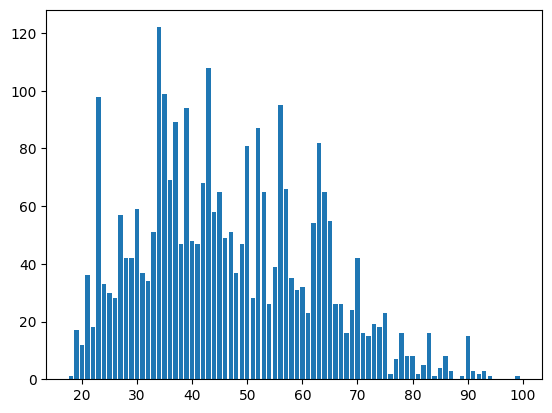

In [ ]:
plt.bar(x=numerical_df['Age'],height=numerical_df['Positive Feedback Count'])

<Axes: xlabel='Age', ylabel='Positive Feedback Count'>

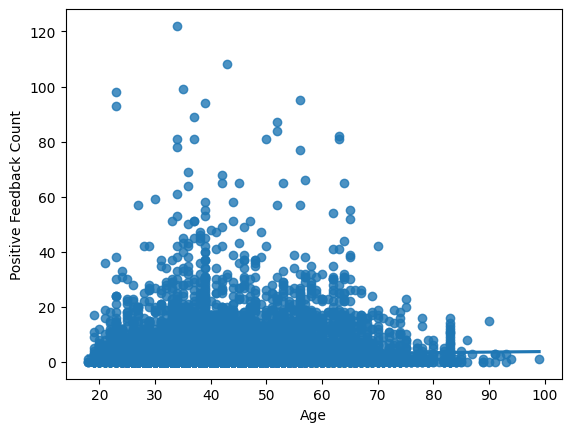

In [ ]:
sns.regplot(x=numerical_df['Age'],y=numerical_df['Positive Feedback Count'])

<ipython-input-38-27af103ac921>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_df)


<Axes: ylabel='Density'>

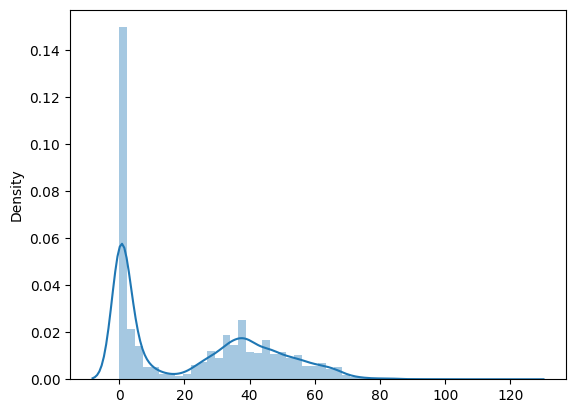

In [ ]:
sns.distplot(numerical_df)